# GTZAN-Genre Dataset Loader

Notebook written by: Aditya Bhattacharjee

* Email contact: aditya.bhattacharjee01@estudiant.upf.edu 
* GitHub username: [@chymaera96](https://github.com/chymaera96)

The following python notebook illustrates the use of the `mirdata` python library to load the GTZAN-Genre Classification dataset. There are three main parts of this notebook:


*   Downloading the Dataset
*   Example #1: Exploring the genre distribution
*   Example #2: Classification using pre-trained model



### About mirdata 
The `mirdata` library provides with the tools for reproducible access and usage of the common Music Information Retrieval (MIR) datasets. In addition to dataloaders for [these](https://mirdata.readthedocs.io/en/stable/source/quick_reference.html) datasets, `mirdata` can be used to validate and access track-wise metadata alleviating the problem of format inconsistencies. For further details, refer to the [documentation](https://mirdata.readthedocs.io/en/latest/). 

### About GTZAN-Genre Dataset
The dataset contains 1000 music excerpts of 30 seconds duration with 100 examples in each of 10 different annotated music genres: Blues, Classical, Country,
Disco, Hip Hop, Jazz, Metal, Popular, Reggae, and Rock. This dataset has been widely used in MIR research for the automatic genre recognition task. For further details on the dataset refer to this [article](https://vbn.aau.dk/ws/portalfiles/portal/74499095/GTZANDB.pdf).

In [ ]:
# Installations for the notebook
!pip install mirdata 
!pip install tqdm

     |████████████████████████████████| 6.1MB 5.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 5.6MB 33.2MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
  Created wheel for jams: filename=jams-0.3.4-cp37-none-any.whl size=64926 sha256=ddfbd0392403795df9a516dacc6809c1172d8fb54942095bf2cfa4cbc95a8976
  Stored in directory: /root/.cache/pip/wheels/2b/b8/c7/092096a3af0eb864cca4e79a44bc883dee5b9767da2c6f8ab3
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp37-none-any.whl size=5591954 sha256=acdb93d3a240ce25409de281bbb9dd5be9a03510d65fbed0361ceed688c47373
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
  Created wheel for mir-eval: filename=mir_eval-0.6-cp37-none-any.whl size=96515 sha256=0bd5bb7837098da5c4408aeeebf302d162d02614393650d808cb1f90029dd

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import numpy as np
from tqdm import notebook as prog
from scipy.io.wavfile import write
from mirdata import initialize
from mirdata.datasets import gtzan_genre
from mirdata.datasets.gtzan_genre import Dataset
import matplotlib.pyplot as plt
import pandas as pd

#Downloading the dataset
For ease of access, we will download the dataset into the mounted Google Drive. The audio recordings are stored in the respective genre folders. In addition to this, the `gtzan_genre\genre` directory contains the metadata in `.mf` files. The dataset can be downloaded in its entirety or partially. However, for this particular document the `REMOTES` dictionary specifies only one key and so it is only possible to partially download genre-wise.

In [ ]:
gtzan = initialize('gtzan_genre', data_home='/gdrive/MyDrive')
gtzan.download() 
gtzan.validate(verbose=True)

100%|██████████| 1000/1000 [15:40<00:00,  1.06it/s]
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


({'tracks': {}}, {'tracks': {}})

For partial download, we will use the `load_audio` function and download only the files which are present in the specific genres we want to download.

In [ ]:
# Utility function for partial download

def partial_download(genres,parent_dir):
  parent_dir = parent_dir + "/gtzan_partial/genres" 
  for item in genre:
    path = os.path.join(parent_dir, item)
    os.makedirs(path)
  with prog.tqdm(total=len(genres)*100) as pbar:
    for key, track in gtzan.load_tracks().items():
      if key.split('.')[0] in genre:
        audio, sr = gtzan.load_audio(track.audio_path)
        dir = parent_dir + '/' + key.split('.')[0]                           
        write(dir + '/' + key + '.wav'  , sr, np.int16(audio))
        pbar.update(1)
  print("------Download complete------")


In [ ]:
genres = ['classical','rock']  # For example
parent_dir = "/gdrive/MyDrive"
partial_download(genres,parent_dir)


------Download complete------


# Example #1 : Exploring the genre distribution of GTZAN

For the next two examples, we will use the pre-trained TensorFlow models from `essentia-tensorflow`. For this, let us start by installing the various dependencies. 

In [ ]:
!pip install essentia-tensorflow
!git clone https://github.com/MTG/essentia-tutorial.git
%cd essentia-tutorial
import essentia.standard as es


Cloning into 'essentia-tutorial'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 46 (delta 5), reused 9 (delta 3), pack-reused 32
Unpacking objects: 100% (46/46), done.
/content/essentia-tutorial/essentia-tutorial/essentia-tutorial


We will use the pre-trained MusiCNN model to produce continuous auto-tagging of the songs in the dataset. From this, we will compute the most predominant tags in each genre class of GTZAN. The model being has been trained with the Million Song Dataset (MSD) and performs an autotagging on a set of 50 tags. Further details can be found in the metadata shown below.

In [ ]:
!curl -SLO https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.pb
!curl -SLO https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3123k  100 3123k    0     0   447k      0  0:00:06  0:00:06 --:--:--  652k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2100  100  2100    0     0   1228      0  0:00:01  0:00:01 --:--:--  1227


In [ ]:
import json

musicnn_metadata = json.load(open('msd-musicnn-1.json', 'r'))

for k, v in musicnn_metadata.items():
    print('{}: {}'.format(k , v))

name: MSD MusiCNN
type: auto-tagging
link: https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.pb
version: 1
description: prediction of the top-50 tags in the dataset
author: Pablo Alonso
email: pablo.alonso@upf.edu
release_date: 2020-03-31
framework: tensorflow
framework_version: 1.15.0
classes: ['rock', 'pop', 'alternative', 'indie', 'electronic', 'female vocalists', 'dance', '00s', 'alternative rock', 'jazz', 'beautiful', 'metal', 'chillout', 'male vocalists', 'classic rock', 'soul', 'indie rock', 'Mellow', 'electronica', '80s', 'folk', '90s', 'chill', 'instrumental', 'punk', 'oldies', 'blues', 'hard rock', 'ambient', 'acoustic', 'experimental', 'female vocalist', 'guitar', 'Hip-Hop', '70s', 'party', 'country', 'easy listening', 'sexy', 'catchy', 'funk', 'electro', 'heavy metal', 'Progressive rock', '60s', 'rnb', 'indie pop', 'sad', 'House', 'happy']
model_types: ['frozen_model']
dataset: {'name': 'The Millon Song Dataset', 'citation': 'http://millionsongdataset.com/', 'si

Here is an example of the predictions made on a randomly sampled track from the GTZAN dataset remotely using `mirdata`

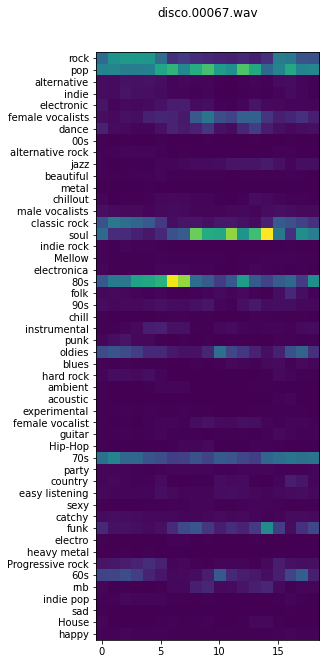

In [ ]:
sr = 16000
track = gtzan.choice_track()
path = track.audio_path
audio = es.MonoLoader(filename=path, sampleRate=sr)()
musicnn_preds = es.TensorflowPredictMusiCNN(graphFilename='msd-musicnn-1.pb')(audio)

classes = musicnn_metadata['classes']

plt.matshow(musicnn_preds.T)
plt.title(path.split('/')[-1])
plt.yticks(np.arange(len(classes)), classes)
plt.gca().xaxis.set_ticks_position('bottom')
plt.show()

We can see that the model produced 19 predictions ($x$ axis). This is because by default MusiCNN operates on 3-second patches with an overlap of 1.5 seconds. Now, we try to see the distribution of the tags according to the genre classes of the dataset. Note: The following cell takes about 35 minutes to run. 

In [ ]:
genre_dict = {}
model = es.TensorflowPredictMusiCNN(graphFilename='msd-musicnn-1.pb')
loader = es.MonoLoader()

with prog.tqdm(total=1000) as pbar:
  for key, track in gtzan.load_tracks().items():
    loader.configure(filename=track.audio_path, sampleRate=sr)
    audio = loader()
    musicnn_preds = model(audio)
    data = np.sum(musicnn_preds.T, axis = 1)
    name = key.split('.')[0]
    if name not in genre_dict.keys():
      genre_dict[name] = []
    else:
      genre_dict[name].append(data)
    pbar.update(1)


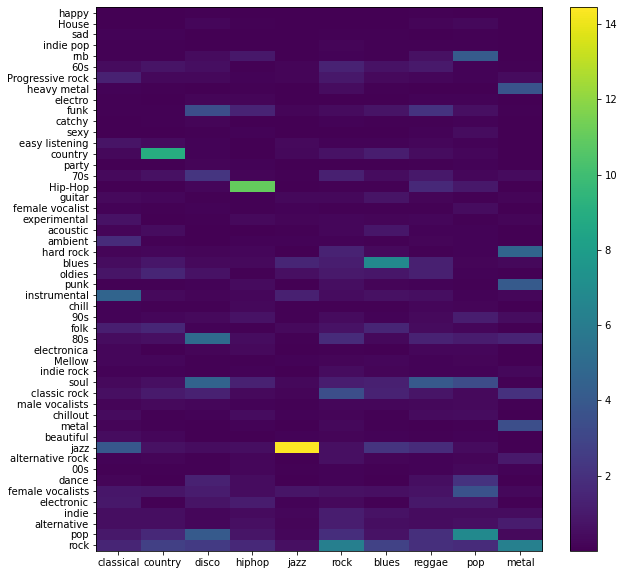

In [ ]:
dist={}
for key,value in genre_dict.items():
  genre = np.array(genre_dict[key])
  dist[key] = np.mean(genre,axis=0)
df = pd.DataFrame(dist)
z = df.values

fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(z, origin='lower', aspect='auto')
plt.title('Distribution of tags among the genre classes')
plt.yticks(np.arange(len(classes)), classes)
plt.xticks(np.arange(len(dist.keys())), dist.keys())
# plt.colorbar();
plt.show()

# Example #1 : Genre Classification using Pre-Trained Models

This example uses the `essentia-tensorflow` to use a pre-trained classifier to test its accuracy on the GTZAN genre dataset. The model being used here is a MusiCNN based neural network classifier which has been trained on the Million Song Dataset.

In [ ]:
!curl -SLO https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.json
!curl -SLO https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.pb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2092  100  2092    0     0   1105      0  0:00:01  0:00:01 --:--:--  1104
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3166k  100 3166k    0     0   478k      0  0:00:06  0:00:06 --:--:--  696k


In [ ]:
genre_metadata = json.load(open('genre_tzanetakis-musicnn-msd-1.json', 'r'))

for k, v in genre_metadata.items():
    print('{}: {}'.format(k , v))

name: genre GTZAN
type: multi-class classifier
link: https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.pb
version: 1
description: classification of music by genre
author: Pablo Alonso
email: pablo.alonso@upf.edu
release_date: 2020-03-31
framework: tensorflow
framework_version: 1.15.0
classes: ['blu', 'cla', 'cou', 'dis', 'hip', 'jaz', 'met', 'pop', 'reg', 'roc']
model_types: ['frozen_model']
dataset: {'name': 'the GTZAN Genre Collection', 'citation': '@article{tzanetakis2002musical,\n  title={Musical genre classification of audio signals},\n  author={Tzanetakis, George and Cook, Perry},\n  journal={IEEE Transactions on speech and audio processing},\n  volume={10},\n  number={5},\n  pages={293--302},\n  year={2002},\n  publisher={IEEE}\n}', 'size': '1000 track excerpts, 100 per genre', 'metrics': {'5-fold_cross_validation_normalized_accuracy': 0.83}}
schema: {'inputs': [{'name': 'model/Placeholder', 'type': 'float', 'shape': [187, 96]}], 'output

In [ ]:

model = es.TensorflowPredictMusiCNN(graphFilename='genre_tzanetakis-musicnn-msd-1.pb')
loader = es.MonoLoader()

# genre_preds = es.TensorflowPredictMusiCNN(graphFilename='genre_tzanetakis-musicnn-msd-1.pb')(audio)

classes = genre_metadata['classes']


# print(genre_metadata[np.argmax(genre_preds)])
# print(track.track_id)

test_values = []
with prog.tqdm(total=1000) as pbar:
  for key, track in gtzan.load_tracks().items():
    loader.configure(filename=track.audio_path, sampleRate=sr)
    audio = loader()
    genre_preds = model(audio)
    genre_preds = np.mean(genre_preds, axis=0)
    cls = track.track_id.split('.')[0][:3]
    if cls == classes[np.argmax(genre_preds)]:
      test_values.append(1)
    else:
      test_values.append(0)
    pbar.update(1)


In [ ]:
print('Accuracy of the model: {}%'.format(np.count_nonzero(test_values) / 10.0))

Accuracy of the model: 94.9%
